In [1]:
import hepi
import smpl
import numpy as np
import hepi.resummino as rs
import hepi.madgraph as mg
import matplotlib.pyplot as plt
rs.set_path("~/git/resummino_ug_to_UX_vNLO/")
print (rs.get_path())

~/git/resummino_ug_to_UX_vNLO/


Running: 59 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

ValueError: The number of derivatives at boundaries does not match: expected 3, got 0+0

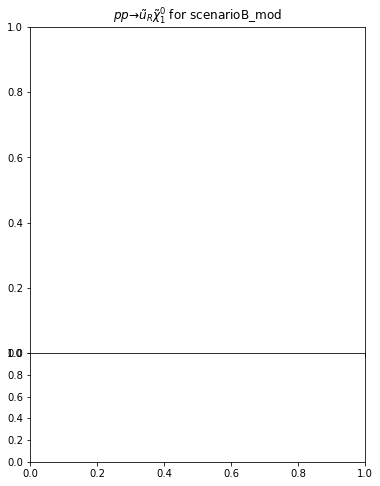

In [3]:
for run_plot in [False ]:
    for scenario in ["scenarioB_mod.in"]:
        ppps = [2000002 ]
        for p in ppps:
            dp = {}
            if p in [2000004,1000004]:
                pdfs= [("CT18NLO","CT18NLO"),  ]
            else:
                pdfs= [("CT18NLO","CT18NLO"),]
            for lo_pdf,nlo_pdf in pdfs:
                i = hepi.Input(hepi.Order.LO, 13000, p, 1000022, scenario, lo_pdf, nlo_pdf, 1., 1.,precision=0.1,max_iters=10)

                li = hepi.mass_scan([i], p, np.linspace(1000, 3000, 1), diff_L_R=100)
                # li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                li = hepi.change_where(li, {"max_iters":20}, pdfset_nlo=0)

                dl = rs.run(li, False, False, run_plot,True)

                if not run_plot:
                    dl = hepi.pdf_error(li,dl)
                    #dl = hepi.scale_error(li,dl)
                    #dl = hepi.combine_errors(dl)
                    dp[nlo_pdf] = dl

                    hepi.mass_and_K_plot(dl,li,p,pdf=True,plot_data=True,fill=True)
                    plt.savefig(input.get_output_dir()+ get_job_name()+"_mass_and_K_" + nlo_pdf + "_" + str(p)+ "_" +str(scenario) + ".pdf",bbox_inches = 'tight', pad_inches = 0)

                    hepi.mass_and_ratio_plot(dl,li,p,pdf=True,plot_data=True,fill=True)
                    plt.savefig(input.get_output_dir()+ get_job_name()+"_mass_and_ratio_" + nlo_pdf + "_" + str(p)+ "_" +str(scenario) + ".pdf",bbox_inches = 'tight', pad_inches = 0)

                    #hepi.tex_table(dl,"mass_"+str(p),input.get_output_dir() + get_job_name()+"_mass" + str(p)+  "_"+ str(nlo_pdf) + "_" +str(scenario) + ".tex")
            if not run_plot:
                plot.data([],[],init=True,color='k')
                cs = plt.rcParams['axes.prop_cycle'].by_key()['color']
                ci = 0
                for l,n in pdfs:
                    mask = dp[n]["NLO_PLUS_NLL_PDF"] != np.array(None)
                    nmask = dp[pdfs[0][1]]["NLO_PLUS_NLL_PDF"] != np.array(None)
                    hepi.vplot(hepi.get_mass(dp[n],p)[mask],dp[n]["NLO_PLUS_NLL"][mask]/plot.unv(dp[pdfs[0][1]]["NLO_PLUS_NLL"][nmask]),yaxis="Ratio",fill=False,interpolate=True,plot_data=False,label=n.replace('_','').replace('as','').upper(), xaxis="$m_{"+hepi.get_name(p) + "}$ [GeV]",logy=False,data_color=cs[ci])
                    hepi.vplot(hepi.get_mass(dp[n],p)[mask],dp[n]["NLO_PLUS_NLL_PDF"][mask]/plot.unv(dp[pdfs[0][1]]["NLO_PLUS_NLL"][nmask]),yaxis="Ratio",fill=True,interpolate=False,plot_data=False,label="", xaxis="$m_{"+hepi.get_name(p) + "}$ [GeV]",logy=False,data_color=cs[ci])
                    ci = ci +1
                hepi.title(plt.gca(),li[0],scenario=scenario[0:8]+ " " + scenario[8])
                plt.savefig(input.get_output_dir()+ get_job_name()+"_pdfs_ratio_" + "_" + str(p)+ "_" +str(scenario) + ".pdf",bbox_inches = 'tight', pad_inches = 0)

                    
    wait()